# Dataset - Add new item

A common workflow is to create a new item based on existing items in a dataset.

This can be in done in several ways. Let's try one of the options.

In [1]:
import numpy as np
import mikeio


In [2]:
ds = mikeio.read("../tests/testdata/NorthSea_HD_and_windspeed.dfsu")
ds

<mikeio.Dataset>
dims: (time:67, element:958)
time: 2017-10-27 00:00:00 - 2017-10-29 18:00:00 (67 records)
geometry: Dfsu2D (958 elements, 570 nodes)
items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  Wind speed <Wind speed> (meter per sec)

1. Create a copy of the DataArray

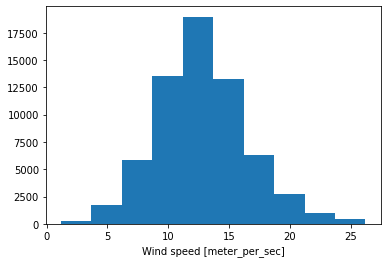

In [3]:
ws2 = ds.Wind_speed.copy()
ws2.plot.hist();

2. Make some modifications

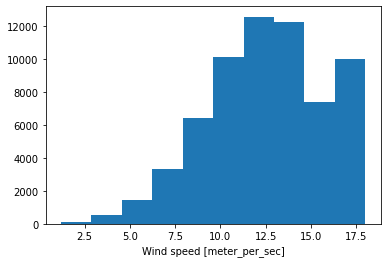

In [4]:
ws2.values = np.clip(ws2.values, 1,18)
ws2.plot.hist();

3. Assign it to a new name in the dataset

In [5]:
ds["Wind speed 2"] = ws2

In [6]:
ds

<mikeio.Dataset>
dims: (time:67, element:958)
time: 2017-10-27 00:00:00 - 2017-10-29 18:00:00 (67 records)
geometry: Dfsu2D (958 elements, 570 nodes)
items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  Wind speed <Wind speed> (meter per sec)
  2:  Wind speed 2 <Wind speed> (meter per sec)

4. Reorder items if necessary

In [7]:
ds2 = ds[["Wind speed 2","Surface elevation", "Wind speed"]]
ds2

<mikeio.Dataset>
dims: (time:67, element:958)
time: 2017-10-27 00:00:00 - 2017-10-29 18:00:00 (67 records)
geometry: Dfsu2D (958 elements, 570 nodes)
items:
  0:  Wind speed 2 <Wind speed> (meter per sec)
  1:  Surface elevation <Surface Elevation> (meter)
  2:  Wind speed <Wind speed> (meter per sec)

In [8]:
ds2.to_dfs("modified.dfsu")